# 1 Extraer info con Beautiful Soup

1. El nombre de las rutas que aparecen en la página web.
2. Donde esta ubicada la ruta.
3. El tipo de ruta. Si esta información añadir "Desconocido".
4. Duración de la ruta.
5. Los kilometros de la ruta.
6. La dificultad de la ruta.
7. El esfuerzo de la ruta.
8. La descripción de la ruta

Sacar dataframe:
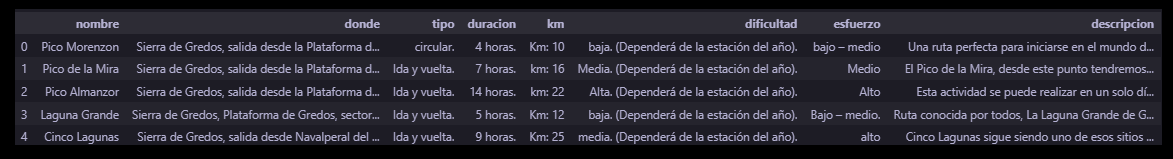

In [ ]:
%pip install requests 
import requests
%pip install pandas
import pandas as pd
%pip install beautifulsoup4 
from bs4 import BeautifulSoup
# he limpiado los outputs para que no ensucien el código

In [3]:
#solicitud a la url y saco código
url_gredos = "https://turismoactiva.com/rutas-de-montana-sierra-de-gredos/"
gredos = requests.get(url_gredos)
#comprobamos el estado de respuesta
print("La respuesta de la petición es:", gredos.status_code)

La respuesta de la petición es: 200


In [ ]:
#creo objeto bs
gredos.soup = BeautifulSoup(gredos.content, 'html.parser')
gredos.soup
print (gredos.soup.prettify())
#he limpiado los outputs para que no ensucien el código

In [6]:
#veo lo que ha sacado
gredos.content

b'<!DOCTYPE html>\n<html lang="es">\n<head><meta charset="UTF-8"><script>if(navigator.userAgent.match(/MSIE|Internet Explorer/i)||navigator.userAgent.match(/Trident\\/7\\..*?rv:11/i)){var href=document.location.href;if(!href.match(/[?&]nowprocket/)){if(href.indexOf("?")==-1){if(href.indexOf("#")==-1){document.location.href=href+"?nowprocket=1"}else{document.location.href=href.replace("#","?nowprocket=1#")}}else{if(href.indexOf("#")==-1){document.location.href=href+"&nowprocket=1"}else{document.location.href=href.replace("#","&nowprocket=1#")}}}}</script><script>class RocketLazyLoadScripts{constructor(){this.v="1.2.4",this.triggerEvents=["keydown","mousedown","mousemove","touchmove","touchstart","touchend","wheel"],this.userEventHandler=this._triggerListener.bind(this),this.touchStartHandler=this._onTouchStart.bind(this),this.touchMoveHandler=this._onTouchMove.bind(this),this.touchEndHandler=this._onTouchEnd.bind(this),this.clickHandler=this._onClick.bind(this),this.interceptedClicks=[]

# ESTRUCTURA
<div class="elementor-widget-wrap elementor-element-populated">
								<div class="elementor-element elementor-element-8a9fba5 elementor-widget elementor-widget-heading" data-id="8a9fba5" data-element_type="widget" data-widget_type="heading.default">
				<div class="elementor-widget-container">
			<h4 class="elementor-heading-title elementor-size-default">Pico Morenzon</h4>		</div>
				</div>
				<div class="elementor-element elementor-element-35a859e6 elementor-widget elementor-widget-text-editor" data-id="35a859e6" data-element_type="widget" data-widget_type="text-editor.default">
				<div class="elementor-widget-container">
							<ul style="font-size: 16.875px; font-style: normal;">
<li style="font-size: 16.875px;"><strong>Donde se realizan:&nbsp;</strong>Sierra de Gredos, salida desde la Plataforma de Gredos. Sector Central</li>
<li style="font-size: 16.875px;"><strong>Tipo de ruta:&nbsp;</strong>circular.</li>
<li style="font-size: 16.875px;"><strong>Duración:</strong>&nbsp;4 horas.</li>
<li style="font-size: 16.875px;"><strong>Km</strong>: 10</li>
<li style="font-size: 16.875px;"><strong>Dificultad Técnica:</strong>&nbsp;baja. (Dependerá de la estación del año).</li>
<li style="font-size: 16.875px;"><strong>Esfuerzo:</strong>&nbsp;bajo – medio</li>
<li style="font-size: 16.875px;"><strong>Personas mínimas:&nbsp;</strong>4 personas.</li>
<li style="font-size: 16.875px;"><strong>Puntos de interés:</strong>&nbsp;Circo de Gredos, valle del Tietar, Refugio del Rey,&nbsp; paisajes impresionante, avistamiento de animales, Circo de montaña.</li>
<li style="font-size: 16.875px;"><strong>Época:&nbsp;</strong>Anua</li>
<li style="font-size: 16.875px;"><strong>Precio:</strong>&nbsp;30€/ persona actividad sin nieve, 40€/persona actividad invernal (preguntar precio para grupos 10 o superior)</li>
</ul>
<h4 class="has-text-color" style="font-style: normal; color: #077863; letter-spacing: normal; word-spacing: 0px;"><strong>Descripción:&nbsp;</strong></h4>
<p style="font-size: 16.875px; font-style: normal;">Una ruta perfecta para iniciarse en el mundo de la montaña, saldremos de la plataforma de Gredos, subiendo por Prado Pozas donde se encuentra el refugio de Reguero Llano, y empezar la subida al balcón de Gredos (Pico Morezon) una de las mejores vistas del Circo de Gredos y el valle del Tietar, podremos ver picos tan lejanos como Lo Montes de Toledo y La Mira, con el Pico Almanzor justo delante de nosotros, para bajar por el mítico refugio el Rey.</p>						</div>
				</div>
					</div>

In [38]:
#1.1 NO ENCUENTRO EL NOMBRE DE CADA RUTA: LO COPIO A MANO (ya sé q no está bien)

#info_gredos = gredos.find_all('div', {'class': 'elementor-heading-title elementor-size-default'})
#for i in info_gredos:
    #nombre_ruta = i.get_text()
    #print(nombre_ruta)

nombre = ['Pico Morenzon', 'Pico de la Mira','Pico Almanzor','Laguna Grande','Cinco Lagunas','Circo de Hoya Moros','Canchal Negro','El Calvitero','Canchal de la Ceja, Torreon, Calvitero','Laguna de Barco','Tres Lagunas, La Nava, Barco y Caballeros','Laguna de los Caballeros','Laguna de la Nava']


In [50]:
#1.2 ubicación de la ruta
lista_donde = gredos.soup.find('div', {'class':'elementor-element-f1386b1'})

#print(lista_donde)

donde = []
#itero para almacenar rutas
for i in lista_donde:
    donde.append(lista_donde.get_text())

donde


['\n\n\nDonde se realizan:\xa0Sierra de Gredos, salida desde la carretera de Nava de Barco. Sector Central\nTipo de ruta: Ida y vuelta.\nDuración: 8 horas.\nkm: 19\nDificultad técnica:\xa0medio. (Dependerá de la estación del año).\nEsfuerzo: Alto\nPersonas mínimas:\xa04 personas. (invierno máximo 2 personas)\nPuntos de interés:\xa0Laguna de la Nava, Avistamiento de animales, barrancos, pozas, cascadas.\nÉpoca: Anual\nPrecio: 30€/ persona actividad sin nieve, 40€/persona actividad invernal (preguntar precio para grupos 10 o superior)\n\n\n\nDescripción:\nSaliendo de Nava de barco, nos vamos metiendo en lo más profundo de Gredos, un paisaje que nos envuelve, mientras que sorteamos ríos y caminamos entre terreno de montaña. Esta laguna encierra un circo impresionante y acogedor al que muy pocos visitantes o montañeros se acercan por su lejanía. \n',
 '\n\n\nDonde se realizan:\xa0Sierra de Gredos, salida desde la carretera de Nava de Barco. Sector Central\nTipo de ruta: Ida y vuelta.\nDura

# 2 Datos Climatológicos Sierra de Gredos con la API de AEMET
    usar el endpoint de "predicciones-especificas"

1. temperatura máxima en la Sierra de Gredos.
2. temperatura mínima en la Sierra de Gredos.
3. fecha en la que se recopilaron los datos.
4. Incluir la sierra de donde vienen los datos.

Sacar data frame:
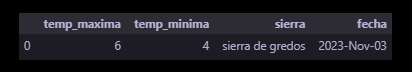

# 3: Diseño de una Base de Datos en SQL

Debes diseñar al menos dos tablas y definir las relaciones entre ellas.
    
    almacenar la información de las rutas de montaña
    almacenar los datos climatológicos de la Sierra de Gredos
## en un futuro podremos incluir más información de otras sierras de la Península Ibérica. 

BONUS: Escribir el código de la creación y relación entre las tablas.